In [ ]:
!nvidia-smi

Sun Dec 13 07:50:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE=[224,224]
train_path = '/content/drive/MyDrive/images/train'
valid_path = '/content/drive/MyDrive/images/val'

In [ ]:
train_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_data.flow_from_directory('/content/drive/MyDrive/images/train',
                                              target_size=(224,224),
                                              batch_size=16,
                                              class_mode='categorical')

Found 192 images belonging to 2 classes.


In [ ]:
test_set = test_data.flow_from_directory('/content/drive/MyDrive/images/val',
                                              target_size=(224,224),
                                              batch_size=16,
                                              class_mode='categorical')

Found 20 images belonging to 2 classes.


In [ ]:
#baseline model

def baseline_model():
  model = Sequential([
                      Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
                      MaxPooling2D(pool_size=(2,2), strides=2),
                      Conv2D(64, (3,3), activation='relu', padding='same'),
                      MaxPool2D(pool_size=(2,2), strides=2),
                      Conv2D(32, (3,3), activation='relu', padding='same'),
                      MaxPool2D(pool_size=(2,2), strides=2),
                      Flatten(),
                      Dense(2, activation='softmax'),               
  ])

  model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = baseline_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [ ]:
#fitting the model
fitting = model.fit_generator(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(train_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
12/12 [==============================] - 93s 8s/step - loss: 0.8127 - accuracy: 0.4583 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 1s 93ms/step - loss: 0.6996 - accuracy: 0.5469 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 1s 93ms/step - loss: 0.6360 - accuracy: 0.6042 - val_loss: 0.6019 - val_accuracy: 0.7000
Epoch 4/10
12/12 [==============================] - 1s 90ms/step - loss: 0.5434 - accuracy: 0.7552 - val_loss: 0.4766 - val_accuracy: 0.7500
Epoch 5/10
12/12 [==============================] - 1s 95ms/step - loss: 0.5216 - accuracy: 0.7396 - val_loss: 0.6335 - val_accuracy: 0.7000
Epoch 6/10
12/12 [==============================] - 1s 92ms/step - loss: 0.4832 - accuracy: 0.8177 - val_loss: 0.4979 - val_accuracy: 0.8000
Epoch 7/10
12/12 [==============================] - 1s 90ms/step - loss: 0.3629

In [ ]:
valid_path = '/content/drive/MyDrive/images/test'
val_data = ImageDataGenerator(rescale=1./255)
val_set = val_data.flow_from_directory('/content/drive/MyDrive/images/test',
                                              target_size=(224,224),
                                              batch_size=16,
                                              class_mode='categorical')


Found 0 images belonging to 0 classes.


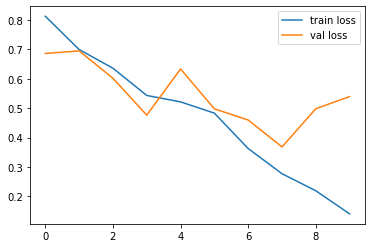

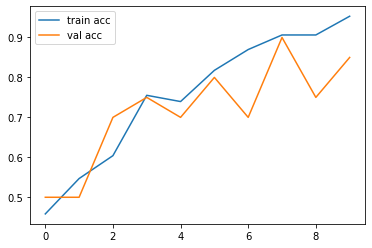

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt


# plot the loss
plt.plot(fitting.history['loss'], label='train loss')
plt.plot(fitting.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(fitting.history['accuracy'], label='train acc')
plt.plot(fitting.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.74262094, 0.25737908],
       [0.05871248, 0.9412876 ],
       [0.0470795 , 0.95292056],
       [0.98665094, 0.01334904],
       [0.8595639 , 0.14043607],
       [0.13667445, 0.86332554],
       [0.6831702 , 0.31682983],
       [0.17046817, 0.8295318 ],
       [0.9715807 , 0.02841938],
       [0.29473677, 0.7052632 ],
       [0.9573831 , 0.04261695],
       [0.9250229 , 0.07497707],
       [0.73322403, 0.266776  ],
       [0.9628258 , 0.03717427],
       [0.14573121, 0.85426885],
       [0.22204676, 0.7779532 ],
       [0.79813075, 0.20186928],
       [0.20196077, 0.7980392 ],
       [0.0333525 , 0.96664757],
       [0.67122835, 0.32877162]], dtype=float32)

In [ ]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)


In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_set

AttributeError: ignored